# Who-Did-What Package Guide

Advanced Usage
Filtering by Subject or Object

python
Copy code
plot_svo_graph(svos, subject_filter='John')
Exporting Hypergraphs

python
Copy code
hypergraphs = export_hypergraphs(svos)
print(hypergraphs)



## Introduction

The Who-Did-What package provides tools for extracting Subject-Verb-Object (SVO) triples from textual data, resolving coreferences, and visualizing the extracted relationships as graphs. It's designed to assist in natural language processing tasks such as information extraction, text analysis, and knowledge graph construction.
Currently, the package only works in English.

<center>
    <img src="https://raw.githubusercontent.com/RiccardoImprota/Who-did-What-Networks/refs/heads/main/WDW-usageexample.jpg" style="width:560px;height:315px;">
    <p style="font-size:12px; color:gray; margin-top:5px;">
        <sup>1</sup> Example usage of the Who-did-What networks framework.
    </p>
</center>

---

## Installation

This package is currently not being featured on *pypi* yet.

As such, this package can only be installed through this Github repository. Note that this requires [Git](https://git-scm.com/) to be installed.


```bash
pip install git+https://github.com/RiccardoImprota/Who-did-What-Networks
```

-----

## How the Package Works
The package processes text to extract SVO triples and builds a graph representing the relationships. Here's a high-level overview:


#### Text Preparation
- Cleaning: Removes unnecessary characters and spaces. Note that we also remove information inside parentheses.
- Coreference Resolution: Replaces pronouns with the nouns they refer to using fastcoref or stanza.

#### SVO Extraction

- Utilizes spaCy for dependency parsing to identify subjects, verbs, and objects.
- Handles various grammatical structures, including compound subjects/objects and passive voice with a custom rule-based approach.
- Data is saved as a pandas dataframe.

#### Graph Construction

- Converts extracted WDW triples into  networkx graphs.
- Nodes represent subjects, verbs, and objects.
- Edges represent the relationships between them, including semantic relations like synonyms.

#### Visualization

- Uses matplotlib to visualize the graph.
- Nodes are color-coded based on Vader sentiment analysis (positive, negative, neutral).
- Edges are styled and colored to represent different types of relationships.

-----

## Usage Guide

#### 1. Extracting the Who-Did-What


First, let's import the necessary functions:


In [1]:
import whodidwhat as wdw

d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


#### 2. Extracting the Who-Did-What

After doing so, let's extract the SVOs (Subject-Verb-Object) from a text using the function `extract_svos_from_text`.
This function has the following parameters:
- text (str): The input text to process.
- coref_solver (str, optional): The coreference resolution tool to use ('fastcoref', 'stanza' or `None`). Default is 'fastcoref'.

In [2]:
text = """Gale and Karlach go to a nice pub to drink a tasty beer and a bad wine. They love to share stories with each other. Wyll really loves eggplants and fantastic aubergines."""
svo = wdw.extract_svos_from_text(text)

d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riccardo.improta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\riccardo.improt

This function generates a pandas DataFrame containing the extracted SVO triples and additional metadata:

- Node 1: The first entity in the relationship.
- WDW: The semantic role of Node 1 in the sentence:
    - Who: Subject
    - Did: Verb
    - What: Object
- Node 2: The semantic entity in the relationship.
- WDW2: The grammatical role of Node 2, similar to WDW.
- Hypergraph: An hypergraph representing relationships and connections between nodes related to the same verb. Is `N/A` when we have a synonymous relationship.
- Semantic-Syntactic: Indicator of the type of relationship:
    - 0: Semantic relationship
    - 1: Synonym relationship
- svo_id: Unique identifier for each verb (different for each verb). Is `N/A` when we have a synonymous relationship.

In [3]:
display(svo)

,Node 1,WDW,Node 2,WDW2,Hypergraph,Semantic-Syntactic,svo_id
0,Gale,Who,go,Did,"[[('Gale', []), ('Karlach', [])], ['go'], [('t...",0,0
1,Karlach,Who,go,Did,"[[('Gale', []), ('Karlach', [])], ['go'], [('t...",0,0
2,go,Did,to nice pub,What,"[[('Gale', []), ('Karlach', [])], ['go'], [('t...",0,0
3,Gale,Who,Karlach,Who,"[[('Gale', []), ('Karlach', [])], ['go'], [('t...",0,0
4,Gale,Who,drink,Did,"[[('Gale', []), ('Karlach', [])], ['drink'], [...",0,1
5,Karlach,Who,drink,Did,"[[('Gale', []), ('Karlach', [])], ['drink'], [...",0,1
6,drink,Did,tasty beer,What,"[[('Gale', []), ('Karlach', [])], ['drink'], [...",0,1
7,drink,Did,bad wine,What,"[[('Gale', []), ('Karlach', [])], ['drink'], [...",0,1
8,Gale,Who,Karlach,Who,"[[('Gale', []), ('Karlach', [])], ['drink'], [...",0,1
9,tasty beer,What,bad wine,What,"[[('Gale', []), ('Karlach', [])], ['drink'], [...",0,1


#### 3. Visualizing the SVO Graph

Use the plot_svo_graph function to visualize the relationships. This function has the following parameters:
- df (DataFrame): The DataFrame returned by extract_svos_from_text.
- subject_filter (str, optional): Filter the graph to focus on a specific subject.
- object_filter (str, optional): Filter the graph to focus on a specific object.

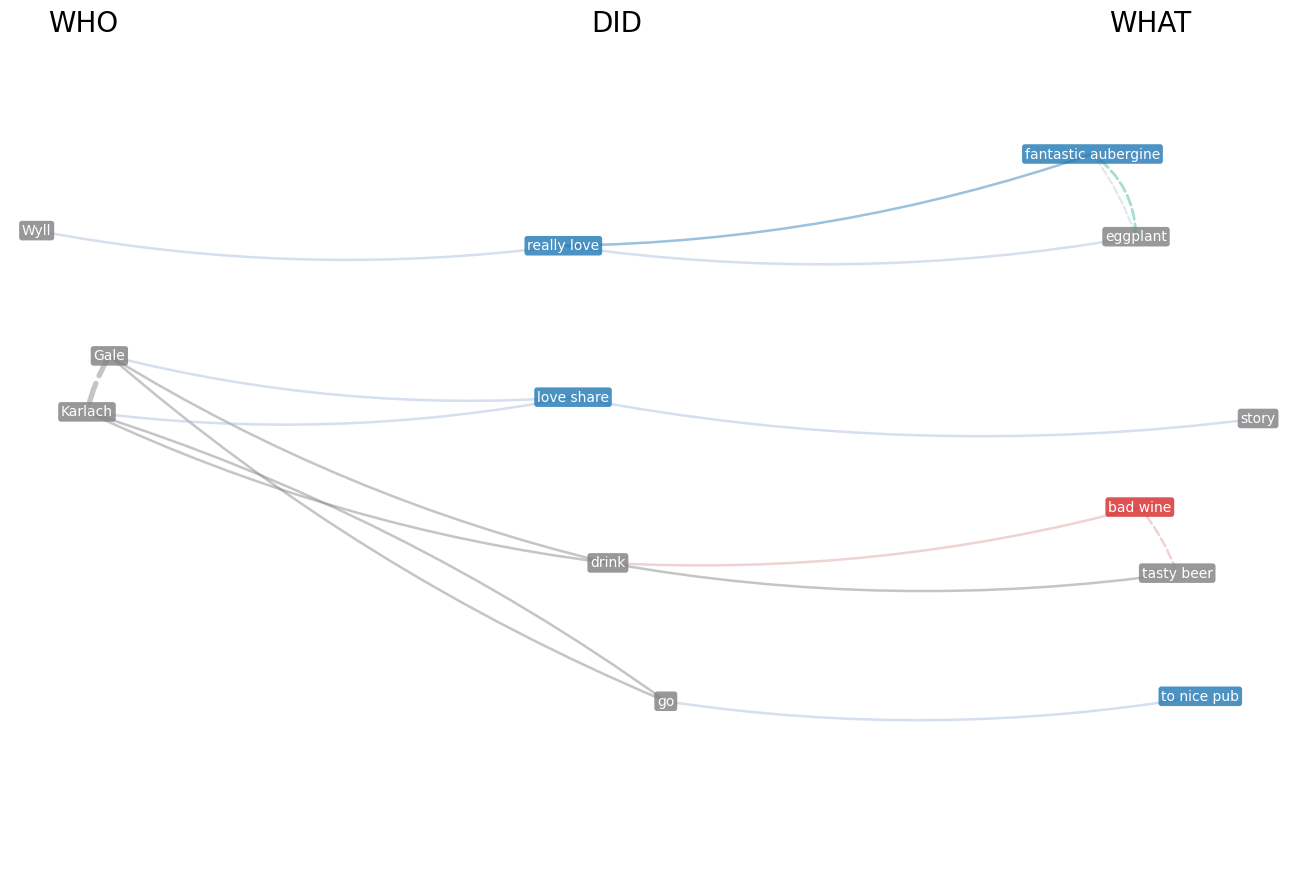

In [4]:
wdw.plot_svo_graph(svo)

You can filter the visualization to focus on specific subjects or objects. Notice that this will pick up all subject that are in the hypergraph where "Math anxiety" is present as a subject.

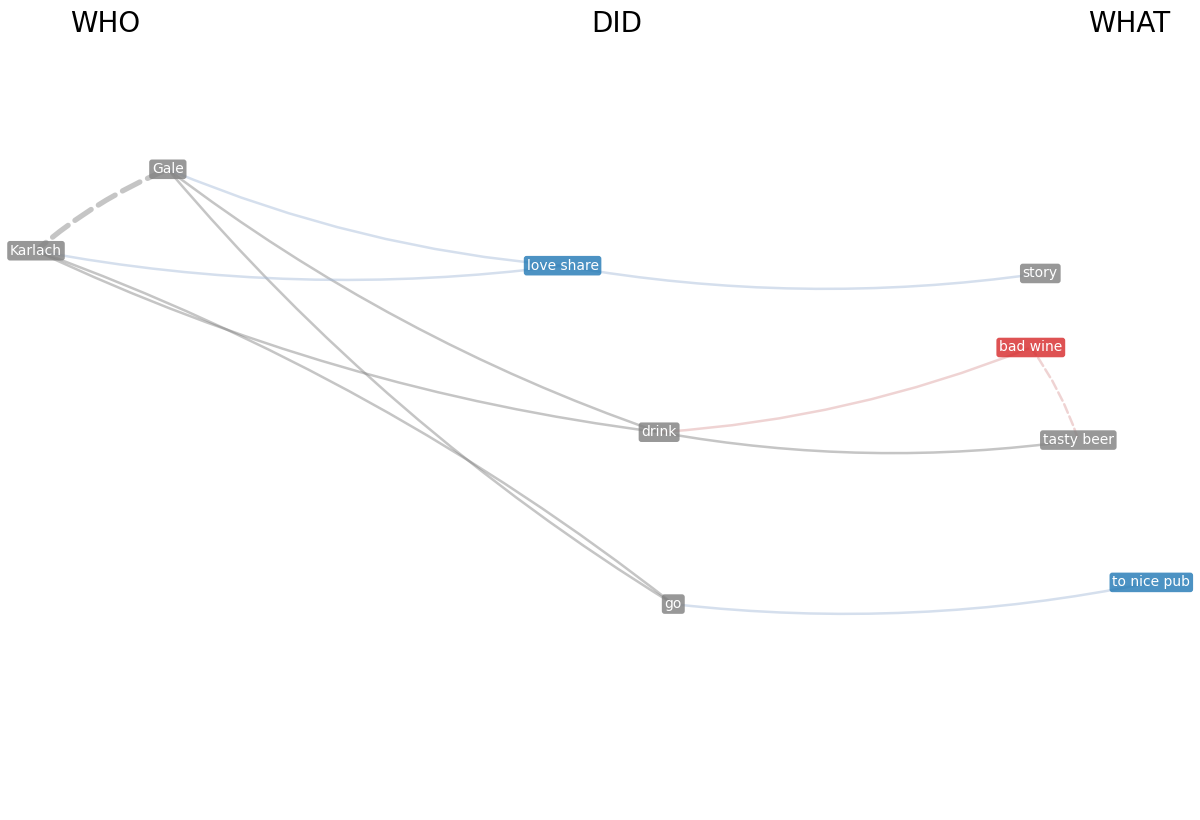

In [5]:
wdw.plot_svo_graph(svo, subject_filter='Gale')

Example 2: Text with Coreferences
Coreference resolution replaces "He" with "John".
The graph shows John as the subject performing both actions.

d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
d:\AnacondaInstallation\envs\WDW-test\Lib\site-packages\transformers\modeling_utils.py:519: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted 

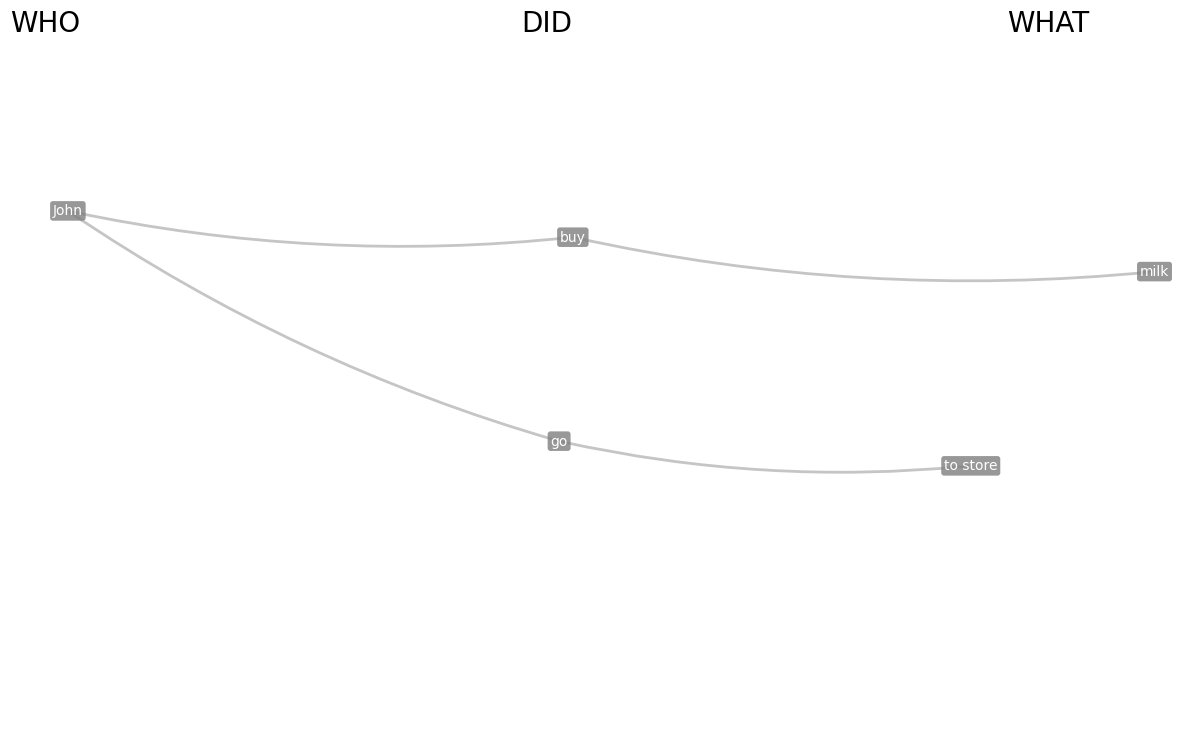

In [6]:
text = "John went to the store. He bought milk."
svos_df = wdw.extract_svos_from_text(text)
wdw.plot_svo_graph(svos_df)


#### Troubleshooting and Tips
- Performance: Processing large texts may take time due to coreference resolution and parsing.
- Dependencies: Ensure all models and data are properly downloaded to avoid errors.
- Extending Functionality: The code is fairly modular; you can integrate additional NLP tasks as needed.